In [1]:
#!pip install PySCeS
#!pip install stochpy

In [2]:
import stochpy


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

In [3]:
def doSequentialSim(smod,n_generations,cell_division_times):    
    for i in range(1,n_generations):     
        ### divide each species between two daughter cells ###        
        for j in range(0,len(smod.data_stochsim.species_labels)): 
            species_amount = smod.SSA.sim_output[-2][1:][j]     
            if species_amount:
                smod.settings.X_matrix[j] = np.random.binomial(n=species_amount
                                                               ,p=0.5,size=1)                
        ### replace last time point with species amounts after division ###
        species_after_division = copy.deepcopy(list(smod.settings.X_matrix))
        species_after_division.insert(0,cell_division_times[0:i].sum())
        species_after_division.append(np.NAN) # no reaction occurred at cell division
        smod.SSA.sim_output[-1] = copy.deepcopy(species_after_division)                         
        ### Set settings for new simulation and simulate the next generation ### 
        smod.settings.starttime = copy.deepcopy(smod.SSA.sim_output[-1][0])
        smod.settings.endtime = smod.settings.starttime + cell_division_times[i]
        smod.SSA.Execute(smod.settings,False) # do stochastic simulation     
    smod.FillDataStochsim() # add all data to data_stochsim object

In [21]:
import stochpy, numpy as np,copy,os,matplotlib.gridspec as gridspec
import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})
smod = stochpy.SSA(model_file='DBD.psc',dir='E:\HXG\igem2020upp\stochastic model\DBD Py')
T_GENERATION = 36000

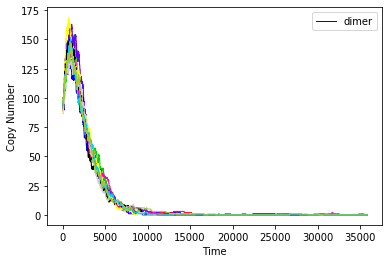

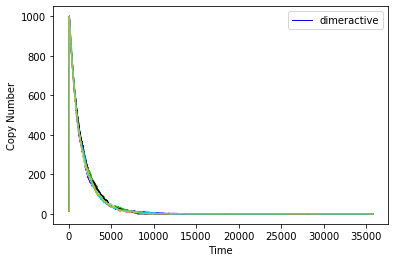

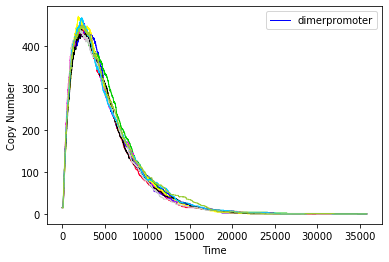

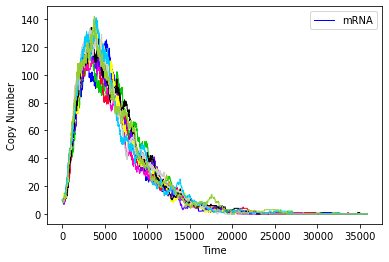

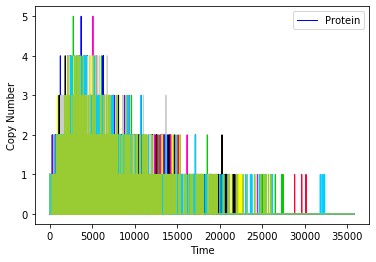

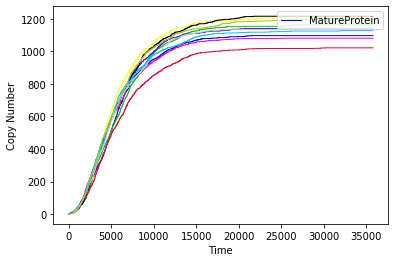

In [22]:
### 2: Do long simulation for probability density function of protein copy numbers ###
N_GENERATIONS = 200
CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=10)
doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
smod.PlotSpeciesTimeSeries(species2plot=['dimer'])
smod.PlotSpeciesTimeSeries(species2plot=['dimeractive'])
smod.PlotSpeciesTimeSeries(species2plot=['dimerpromoter'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'])
smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'])

simulation with Caff, kpromo, kProtmat = 472 ,  0.06 ,  0.1
Parameters are: ['kdimerization', 'kdimerdeg', 'kActivate', 'kreverse', 'kDNAbinding', 'kmRNA_syn', 'kmRNAdeg', 'kProtsyn', 'kProteindeg', 'kProtmat', 'kProtmat_deg']
Parameters are: ['kdimerization', 'kdimerdeg', 'kActivate', 'kreverse', 'kDNAbinding', 'kmRNA_syn', 'kmRNAdeg', 'kProtsyn', 'kProteindeg', 'kProtmat', 'kProtmat_deg']
done
simulation with Caff, kpromo, kProtmat = 472 ,  0.06 ,  0.5
Parameters are: ['kdimerization', 'kdimerdeg', 'kActivate', 'kreverse', 'kDNAbinding', 'kmRNA_syn', 'kmRNAdeg', 'kProtsyn', 'kProteindeg', 'kProtmat', 'kProtmat_deg']
Parameters are: ['kdimerization', 'kdimerdeg', 'kActivate', 'kreverse', 'kDNAbinding', 'kmRNA_syn', 'kmRNAdeg', 'kProtsyn', 'kProteindeg', 'kProtmat', 'kProtmat_deg']
done
simulation with Caff, kpromo, kProtmat = 472 ,  0.06 ,  1
Parameters are: ['kdimerization', 'kdimerdeg', 'kActivate', 'kreverse', 'kDNAbinding', 'kmRNA_syn', 'kmRNAdeg', 'kProtsyn', 'kProteindeg', 'kPro

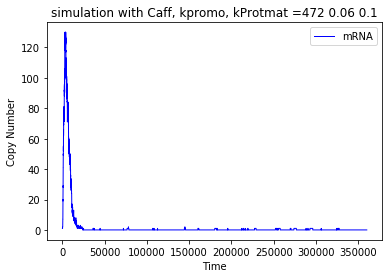

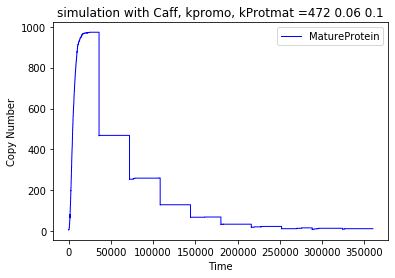

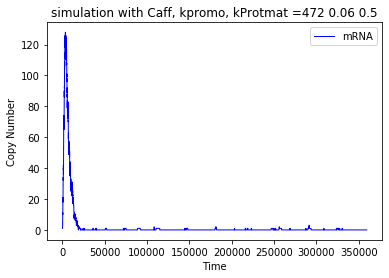

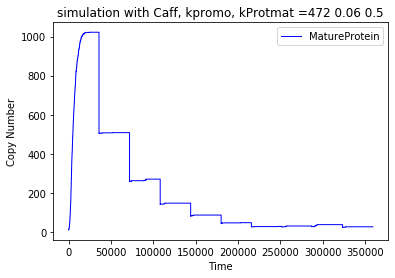

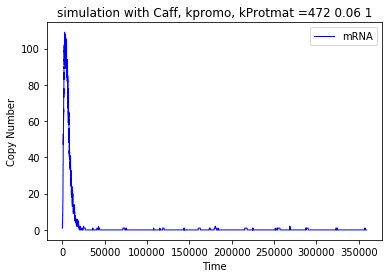

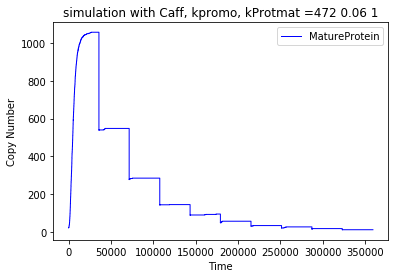

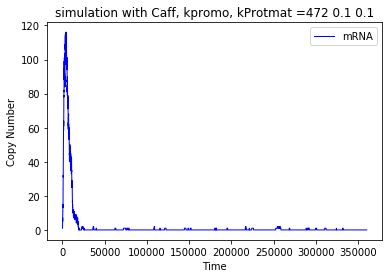

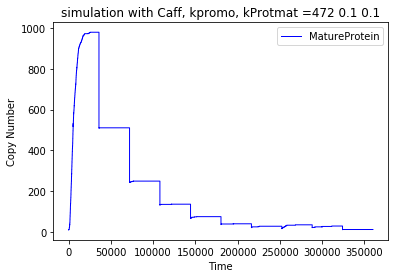

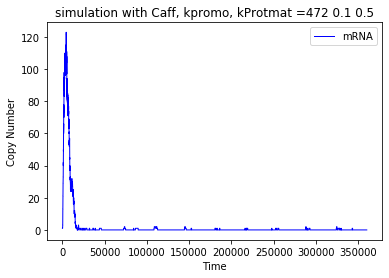

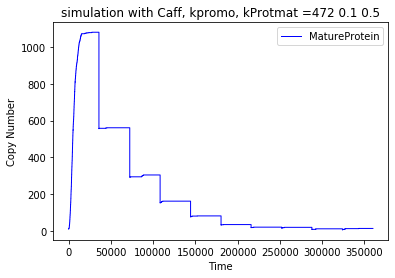

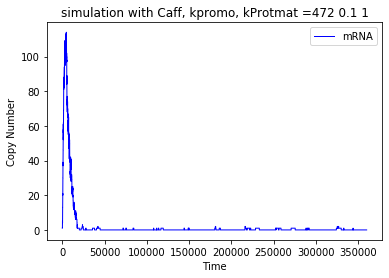

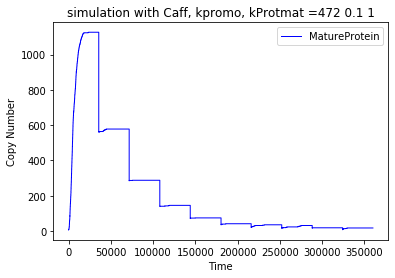

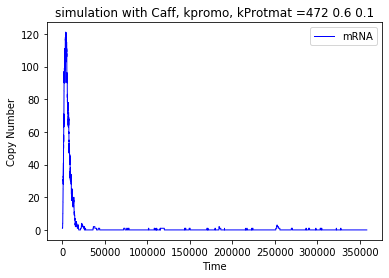

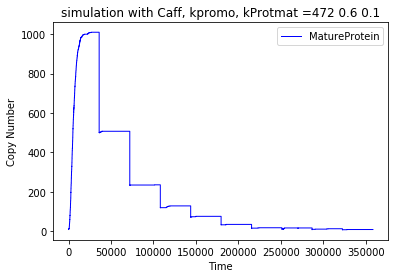

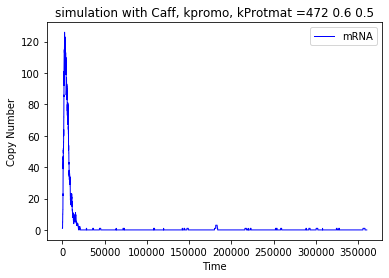

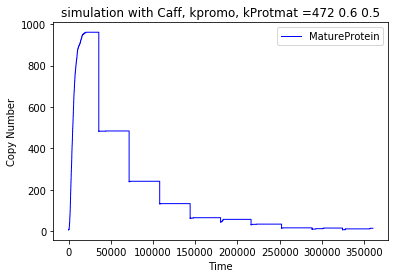

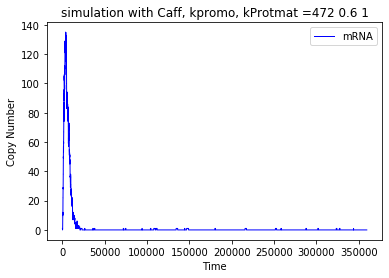

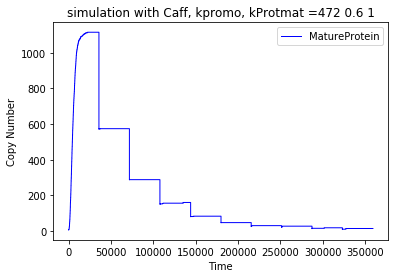

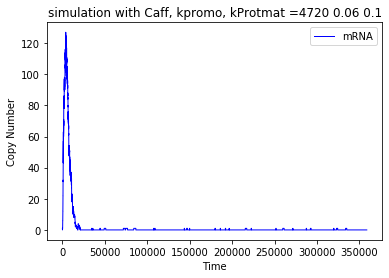

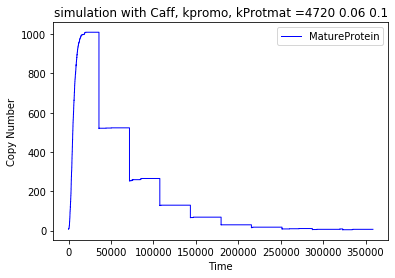

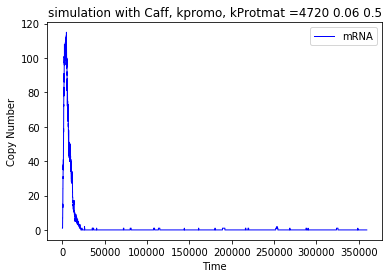

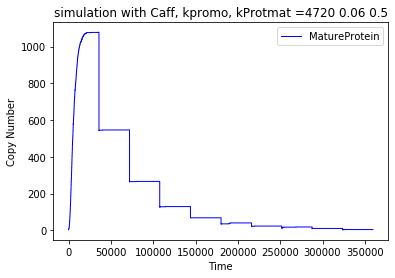

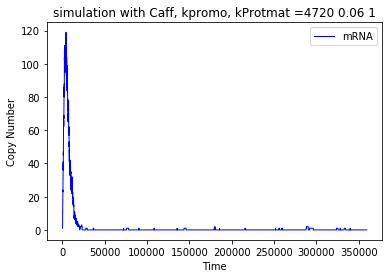

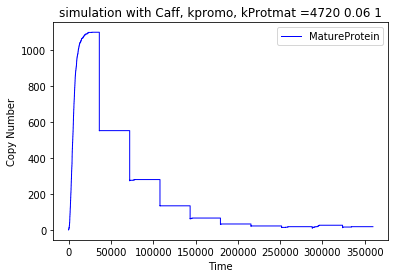

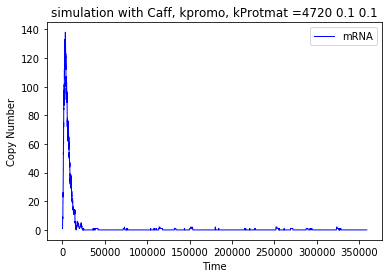

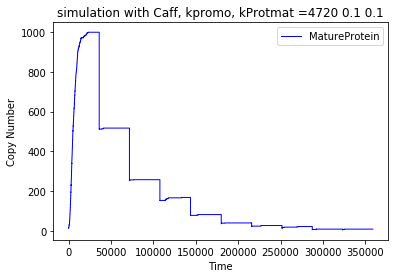

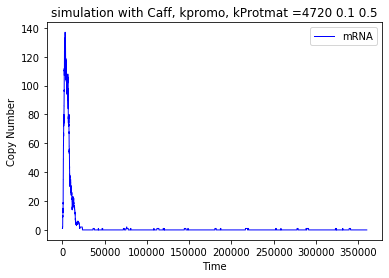

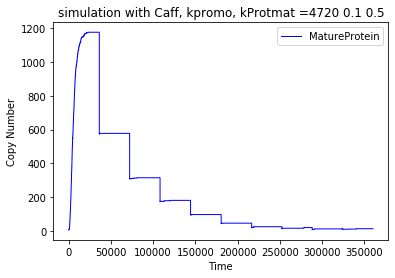

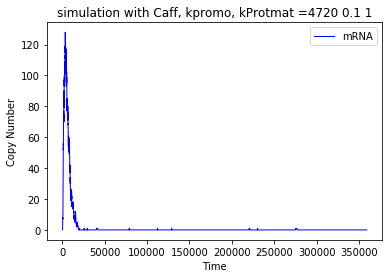

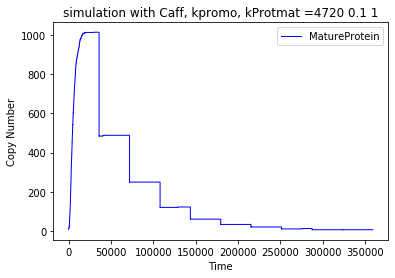

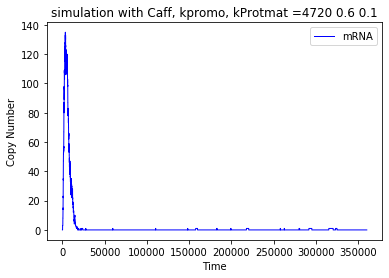

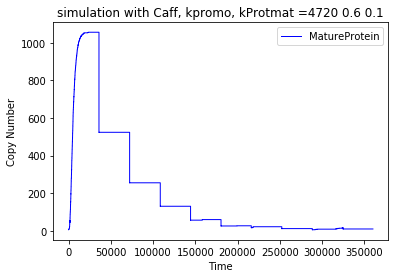

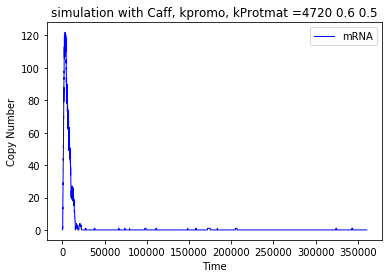

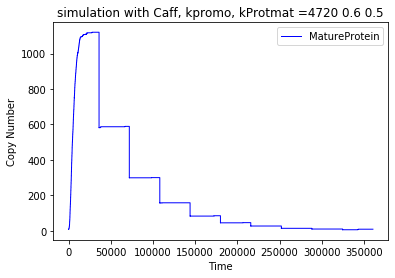

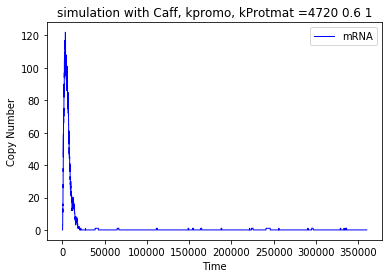

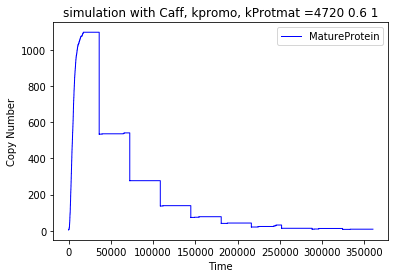

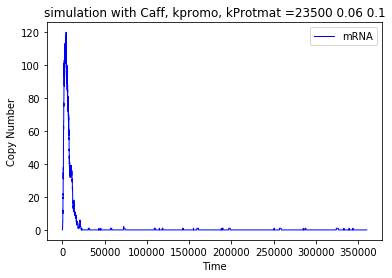

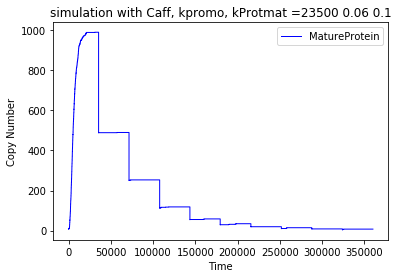

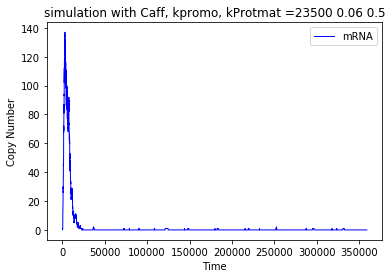

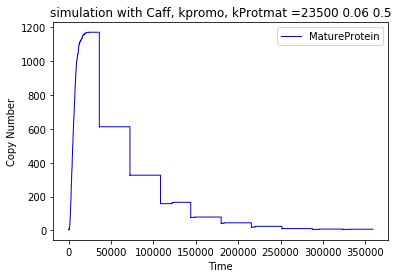

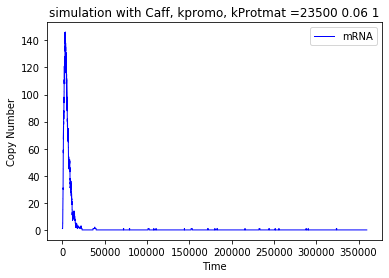

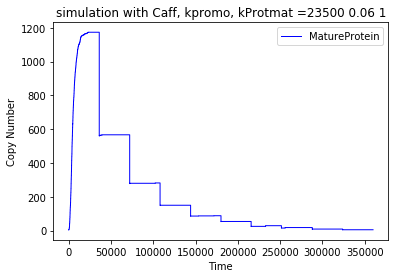

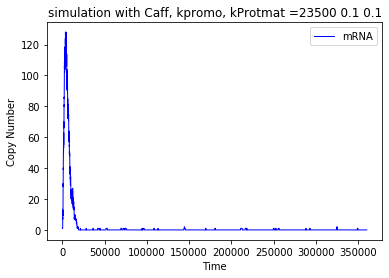

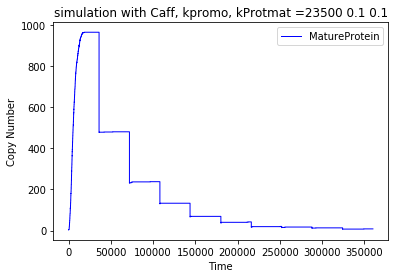

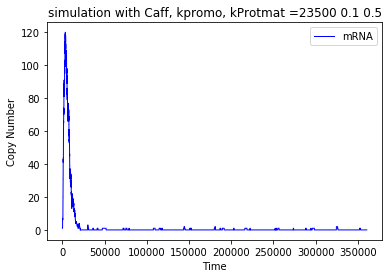

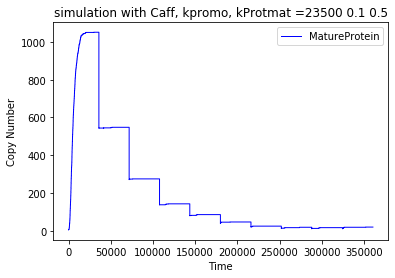

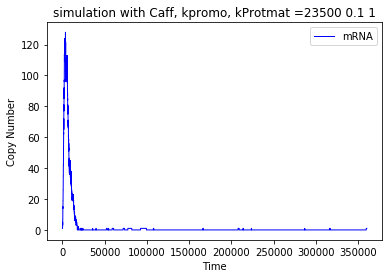

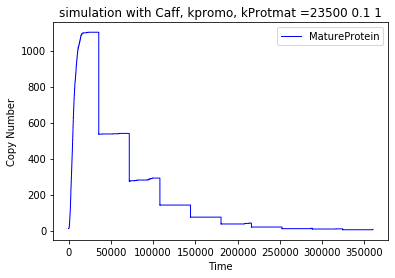

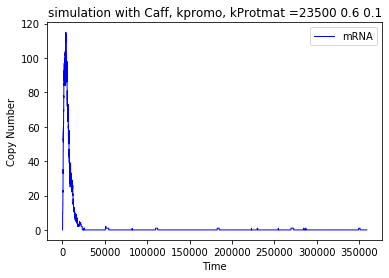

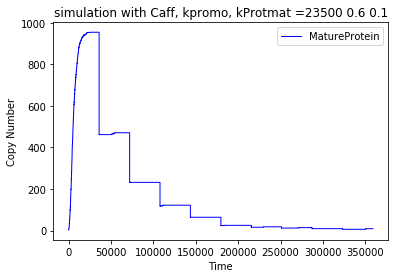

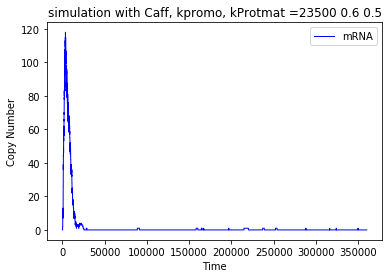

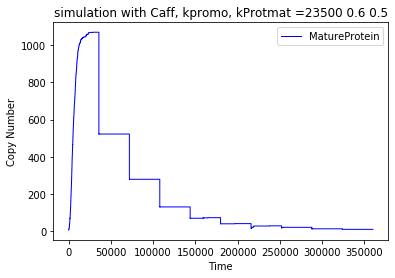

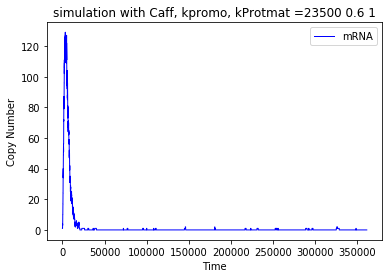

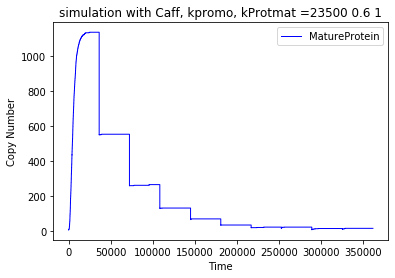

In [23]:
### 1: Do short looping simulations for a time series plot ###
Caff = [472,4720,23500]
kpromo = [0.06,0.1,0.6]
kProtmat = [0.1,0.5,1]
for i in Caff:
  for j in kpromo:
    for k in kProtmat:
      print('simulation with Caff, kpromo, kProtmat =',i,', ',j,', ',k)
      graphtitle = str('simulation with Caff, kpromo, kProtmat ='+str(i)+' '+str(j)+' '+str(k))
      smod.ChangeParameter('Caff',i)
      smod.ChangeParameter('kpromo',j)
      smod.ChangeParameter('kProtmat',k)
      N_GENERATIONS = 10
      CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
      smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=1)
      doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
      smod.PlotSpeciesTimeSeries(species2plot=['mRNA'],title=graphtitle)
      smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'],title=graphtitle)
    
      print('done')

In [1]:
### Test a model with a time event
smod.Model('DBD.psc') 
smod.DoStochSim(trajectories=1,end=600,mode='time')
smod.GetRegularGrid()
smod.PlotAverageSpeciesTimeSeries()

NameError: name 'smod' is not defined

In [10]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install tqdm

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
pip install --upgrade jupyterthemes

Requirement already up-to-date: jupyterthemes in d:\python\lib\site-packages (0.20.0)
Note: you may need to restart the kernel to use updated packages.


In [5]:
username$ jt -t

SyntaxError: invalid syntax (<ipython-input-5-462feef292c0>, line 1)